# HW 8: Clustering by K-Means
---

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
%matplotlib inline

# Import a Beer data set to a dataframe

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1bjCoHPxe_96Ijoz8eCzYUikwlkPA6XDc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('beer.txt')

In [0]:
url = 'beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


#### Let's pick the feature set

In [0]:
# Define X.
X = beer.drop('name', axis=1)

#### Do we need to define a target called Y? Explain.

**Answer:**

Comparing to Classification creating a model to prodict, clustering is finding groups that exist in the data already. Since we don't have labeled data in this dataset, we use unsuperbised methods. 
don't have "true" target to compare. There are no true targets to predict, we derive the likely categories from the structure in our data.

## K-Means Clustering

#### Create a K-means model with three clusters and fit it with 'X'.

In [0]:
#
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Review and show the cluster labels.

In [0]:
#
label=model.labels_
label

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1],
      dtype=int32)

#### Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [0]:
#
beer['cluster'] = label

beer.sort_values(by = ['cluster'], ascending=False)

,name,calories,sodium,alcohol,cost,cluster
18,Olympia_Goled_Light,72,6,2.9,0.46,2
15,Pabst_Extra_Light,68,15,2.3,0.38,2
19,Schlitz_Light,97,7,4.2,0.47,1
11,Coors_Light,102,15,4.1,0.46,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
14,Kirin,149,6,5.0,0.79,0
13,Becks,150,19,4.7,0.76,0


#### What feature(s) do the clusters seem to be based on? Why?

**Answer:** 

The clusters seem to be based on calories and alcohol because within each cluster, Calories value and alcohol value are close. Between different clusters, calories and alcohol values are very different.

#### Show the cluster centers.

In [0]:
#
model.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.44      ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

#### Calculate the mean of each feature for each cluster.

In [0]:
# hint: 
# beer.groupby('cluster').mean()
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


#### Save the `mean` of cluster centers as 'centers'.

In [0]:
#
centers = beer.groupby('cluster').mean()

#### Create a "colors" array for plotting.

In [0]:

colors = np.array(['red', 'green', 'blue', 'yellow'])

#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue).

Text(0, 0.5, 'alcohol')

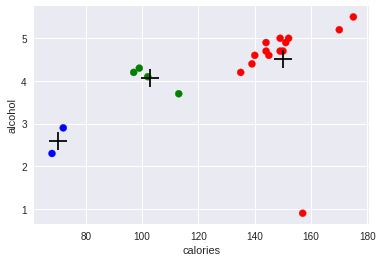

In [0]:
#
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50)
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('calories')
plt.ylabel('alcohol')


#### Create a scatter plot matrix (clusters should be colored as: 0=red, 1=green, 2=blue).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1aa8a7fd68>,
      dtype=object)

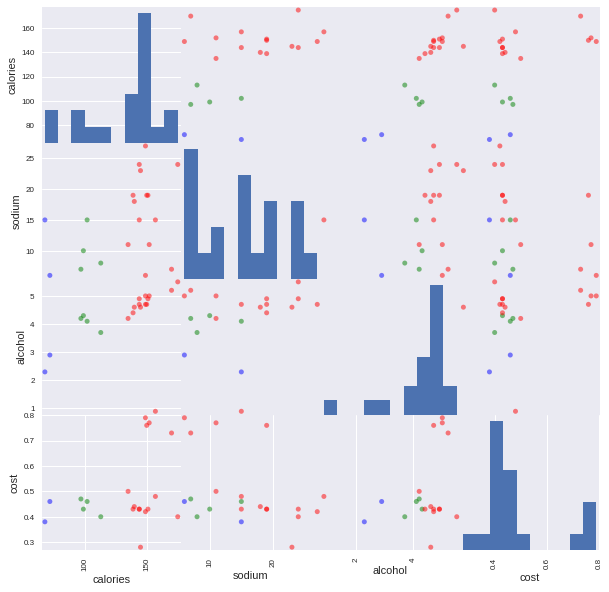

In [0]:
#
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

<a id="repeat-with-scaled-data"></a>
### Repeat With Scaled Data

Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features.

#### Use StandardScaler to scale the data X.

In [0]:
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
X_scaled 

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

#### Show the scaled X indeed has mean and standard deviation close to 0 and 1, respectively.

In [0]:
#
print('Scaled X mean:', X_scaled.mean())
print('Scaled X standard deviation', X_scaled.std())

Scaled X mean: -3.8302694349567903e-16
Scaled X standard deviation 0.9999999999999999


#### Repeat K-means with three clusters on scaled data.

In [0]:
#
model = KMeans(n_clusters=3, random_state=1)
model.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [0]:
#
label2=model.labels_
beer['cluster'] = label2
beer.sort_values(by = ['cluster'], ascending=False)

,name,calories,sodium,alcohol,cost,cluster
14,Kirin,149,6,5.0,0.79,2
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
19,Schlitz_Light,97,7,4.2,0.47,1
2,Lowenbrau,157,15,0.9,0.48,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1


#### What are the "characteristics" of each cluster?

**Answer:** 

Cluster 0: Regular beers
Cluster 1: Light beers (lower calorie, lower alcohol)
Cluster 2: Expensive (high cost)

#### Show the cluster centers.

In [0]:
#
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


#### Create scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1aa9b6d9e8>,
      dtype=object)

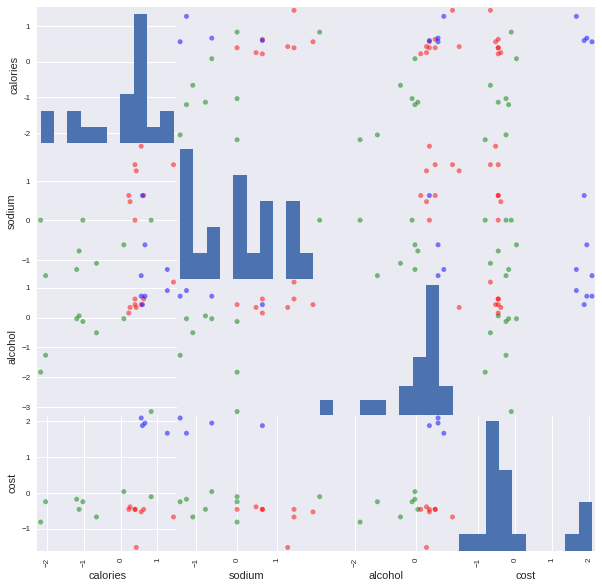

In [0]:
beer_scaled = pd.DataFrame(X_scaled, columns=beer.columns[1:-1])
pd.scatter_matrix(beer_scaled, c=colors[beer.cluster], figsize=(10,10), s=100)

#### Do you notice any feaure(s) irrelevant in clustering assignments? How would you explain this?

**Answer:**

 It appears that sodium is not relevent in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type (indeed, the sodium is quite low compared to most foods).

####  Do you notice any feaure(s) irrelevant in clustering assignments? How would you explain this?

**Answer:** It appears that `sodium` is not often useful in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type (indeed, the sodium is quite low compared to most foods).

### Applying the elbow method to k-means

The [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) is one possible method to help narrow in on the ideal value of **K**. The method is built around the concept of diminishing returns where the percentage of explained variance is reviewed as a function of the number of clusters: One should choose a number of clusters where the next cluster doesn't significantly explain additional variance. 

[Determining the right number of clusters](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)   

Try a range of K and plot both the Inertia Over K and Silhouette Over K curves.

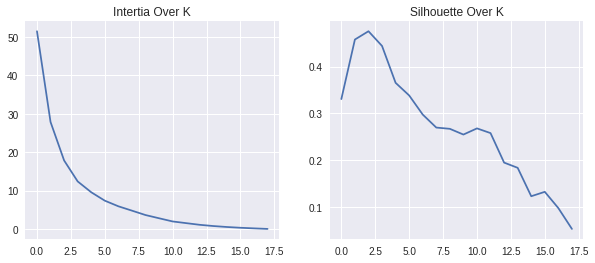

In [0]:
values = range(2,20)
scores = []
for value in values:        
    model = KMeans(n_clusters = value)
    #X = df[["x", "y"]]
    model.fit(X_scaled)
    #scores    = 
    inertia = model.inertia_
    scores.append({
                    "inertia":    inertia,
                    "silhouette": metrics.silhouette_score(X_scaled, model.labels_)
                })

eval_scores = pd.DataFrame(scores)
eval_scores.head()

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
eval_scores["inertia"].plot(ax=ax[0], title="Intertia Over K")
eval_scores["silhouette"].plot(ax=ax[1], title="Silhouette Over K")


#### Let's analyze the above

- Do you see the **"elbow"**?

- What's the best value of k?



**Answer**

From K=1-2, the sum of squared errors droped rapidly. AfterK = 2 and later, the additional cluster doesn't significant. 

The Silhouette figure shows the best value of K=2, which reaches the highest sihouette score